<a href="https://colab.research.google.com/github/glaubosclimaco/entregaveis/blob/main/Cenario_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza e organização dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#lendo o arquivo e usando um parser para datas (para futuras analises)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cenário I/sample.xlsm',parse_dates=['Order Date','Ship Date'])


###
# LIMPEZA DOS DADOS 
###

# verificando quantidade de valores nulos
print(df.isnull().sum(),'\n')

# verificando quantos paises existem
#print(df.Country.unique(),'\n')

# qual o range dos anos?
# print(df['Order Date'].dt.year.unique())
# print(df['Ship Date'].dt.year.unique())
# print(df[df['Ship Date'].dt.year == 2018],'\n') ok



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64 



In [2]:
print("\nPossíveis outliers para Sales:\n\n")

q_low = df["Sales"].quantile(0.001)
q_hi  = df["Sales"].quantile(0.999)

df_filtered = df[(df["Sales"] < q_low)] 
print(df_filtered,'\n\n')
df_filtered = df[(df["Sales"] > q_hi)] 
print(df_filtered,'\n\n')


Possíveis outliers para Sales:


      Row ID        Order ID Order Date  ... Quantity Discount  Profit
1332  1333.0  CA-2014-122567 2014-02-16  ...      3.0      0.8 -1.7280
2106  2107.0  US-2014-152723 2014-09-26  ...      1.0      0.8 -1.4016
2761  2762.0  CA-2017-126536 2017-10-12  ...      1.0      0.0  0.4356
4101  4102.0  US-2017-102288 2017-06-19  ...      1.0      0.8 -1.1100
4711  4712.0  CA-2014-112403 2014-03-31  ...      1.0      0.7 -0.5964
7548  7549.0  CA-2014-103492 2014-10-10  ...      1.0      0.8 -1.5715
8024  8025.0  CA-2014-129189 2014-07-21  ...      1.0      0.8 -1.8270
8033  8034.0  CA-2015-119690 2015-06-25  ...      2.0      0.8 -1.4760
8658  8659.0  CA-2016-168361 2016-06-21  ...      1.0      0.8 -1.3376
9292  9293.0  CA-2017-124114 2017-03-02  ...      1.0      0.8 -0.9452

[10 rows x 21 columns] 


      Row ID        Order ID Order Date  ... Quantity Discount     Profit
2623  2624.0  CA-2017-127180 2017-10-22  ...      4.0      0.2  3919.9888
2697  2698

In [3]:

# print("\nPossíveis outliers para Quantity:\n\n")


# q_low = df["Quantity"].quantile(0.1)
# q_hi  = df["Quantity"].quantile(0.99)

# df_filtered = df[(df["Quantity"] < q_low)] 
# print(df_filtered,'\n\n')
# df_filtered = df[(df["Quantity"] > q_hi)] 
# print(df_filtered,'\n\n')

print("\nPossíveis outliers para Profit:\n\n")

q_low = df["Profit"].quantile(0.001)
q_hi  = df["Profit"].quantile(0.999)

df_filtered = df[(df["Profit"] < q_low)] 
print(df_filtered,'\n\n')
df_filtered = df[(df["Profit"] > q_hi)] 
print(df_filtered,'\n\n')




Possíveis outliers para Profit:


      Row ID        Order ID Order Date  ... Quantity Discount     Profit
683    684.0  US-2017-168116 2017-11-04  ...      4.0      0.5 -3839.9904
1199  1200.0  CA-2016-130946 2016-04-08  ...      4.0      0.8 -1850.9464
2697  2698.0  CA-2014-145317 2014-03-18  ...      6.0      0.5 -1811.0784
3011  3012.0  CA-2017-134845 2017-04-17  ...      5.0      0.7 -3399.9800
3151  3152.0  CA-2015-147830 2015-12-15  ...      2.0      0.7 -2639.9912
4991  4992.0  US-2017-122714 2017-12-07  ...      5.0      0.8 -2929.4845
5310  5311.0  CA-2017-131254 2017-11-19  ...      6.0      0.8 -2287.7820
7772  7773.0  CA-2016-108196 2016-11-25  ...      5.0      0.7 -6599.9780
9639  9640.0  CA-2015-116638 2015-01-28  ...     13.0      0.4 -1862.3124
9774  9775.0  CA-2014-169019 2014-07-26  ...      8.0      0.8 -3701.8928

[10 rows x 21 columns] 


      Row ID        Order ID Order Date  ... Quantity Discount     Profit
509    510.0  CA-2015-145352 2015-03-16  ...      

* *Sales:* Se considerarmos que a coluna “Sales” representa o número de vendas de um certo produto, temos algumas anomalias nos dados, nos casos em que “Sales” é menor que 1 (um). O que significaria isso?



# Análise exploratória

In [4]:
# Correlacao entre as colunas
print('Correlacao entre as colunas:\n')
print(df.corr())

# Descricao dos dados
print("\nEstatística descritiva:\n")
print(df.describe())

Correlacao entre as colunas:

               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000

Estatística descritiva:

            Row ID   Postal Code  ...     Discount       Profit
count  9994.000000   9994.000000  ...  9994.000000  9994.000000
mean   4997.500000  55190.379428  ...     0.156203    28.656896
std    2885.163629  32063.693350  ...     0.206452   234.260108
min       1.000000   1040.000000  ...     0.000000 -6599.978000
25%    2499.250000  23223.000000  ...     0.000000     1.728750
50%    4997.500000  56430.500000  .

* *Profit negativo:*
A planilha contém valores negativos da coluna "Profit". Como se trata do lucro das vendas, é um valor que considerei inesperado.
Foi verificado que a coluna "Discount" possui uma correlação de -0.21 com a coluna "Profit", uma das mais altas da tabela. Então, podemos suspeitar que às vezes está sendo aplicado muito desconto, causando prejuízo (profit negativo). A Figura 1 ilustra em que casos isso ocorre.
Porém, não foi possível identificar uma expressão que melhor descreva a relação entre essas duas colunas, pois "profit" deve estar também relacionado com as colunas "Sales" e "Quantity".

Profit versus Discount.png



In [5]:
print('\n\n**Análise exploratória:**\n\n')

print('Valor das vendas por região: \n')
print(df.groupby("Region").Sales.sum(),'\n')


print('\n10 produtos mais vendidos:\n')
print(df.groupby("Product Name").Sales.sum().sort_values(ascending=False).head(10),'\n\n')


print('\n10 produtos mais lucrativos:\n')
print(df.groupby("Product Name").Profit.sum().sort_values(ascending=False).head(10),'\n\n')

print('\nCategorias mais lucrativas:\n')
print(df.groupby("Category").Profit.sum(),'\n\n')




**Análise exploratória:**


Valor das vendas por região: 

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64 


10 produtos mais vendidos:

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System               


Vendas por segmento:


<function matplotlib.pyplot.show>

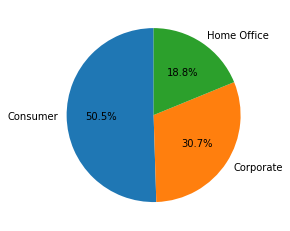

In [6]:

print('\nVendas por segmento:')
pie_data = (df.groupby('Segment')['Sales'].sum()).to_frame()
pie_data['Percent_Sale'] = round((pie_data.Sales/sum(pie_data.Sales))*100)
plt.pie(pie_data.Percent_Sale, labels=pie_data.index,  startangle=90, autopct='%.1f%%');plt.show


O segmento de consumo é o que está gerando mais vendas, então podemos concluir que significa que a maioria das compras é feita por clientes simples



Sales por Ship Mode: 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


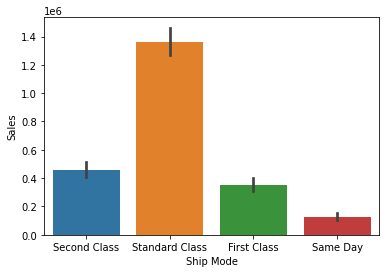

In [7]:
print('\nSales por Ship Mode: \n')
sns.barplot('Ship Mode','Sales',data=df,estimator=sum)



Como a maioria das vendas são para pessoas comuns (físicas), então faz sentido ter  ship mode padrão em maior quantidade.

<Figure size 432x288 with 0 Axes>

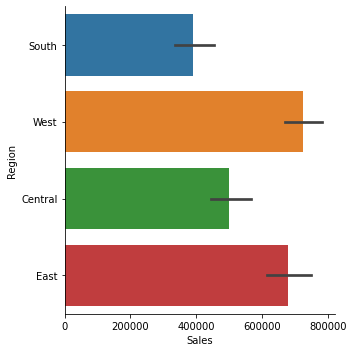

In [8]:
#vendas por regiao
plt.figure()
sns.catplot(y = 'Region',x = 'Sales',data=df,kind='bar',estimator=sum)
plt.show()

**Dados não relacionados**
	
  Não há uma chave estrangeira única entre os dados de “Orders” e “Returns”, o que impossibilita saber qual pedido foi devolvido.
	
Por ex.:

Na planilha “Returns” temos

| Returned 	| Order ID       	|
|----------	|----------------	|
| Yes      	| CA-2017-153822 	|


Já na planilha “Orders” temos diferentes pedidos, com produtos diferentes, mas com a mema ID: 


| Order ID       	| Order Date 	| Ship Date 	| Ship Mode      	| Customer ID 	| Customer Name 	|
|----------------	|------------	|-----------	|----------------	|-------------	|---------------	|
| CA-2017-153822 	| 9/19/2017  	| 9/25/2017 	| Standard Class 	| AB-10105    	| Adrian Barton 	|
| CA-2017-153822 	| 9/19/2017  	| 9/25/2017 	| Standard Class 	| AB-10105    	| Adrian Barton 	|
| CA-2017-153822 	| 9/19/2017  	| 9/25/2017 	| Standard Class 	| AB-10105    	| Adrian Barton 	|
| CA-2017-153822 	| 9/19/2017  	| 9/25/2017 	| Standard Class 	| AB-10105    	| Adrian Barton 	|



**Mesmos “Costumers” com “Regions” diferentes**
	
Os dados podem estar inconsistentes em relação aos clientes e as suas regiões. 

Por ex.: A cliente Anna Andreadi na ROW ID 8006 está com Region East e na ROW ID está na Region Central


# Trabalhos futuros:

* Caso houvesse mais tempo, seria realizado uma análise mais profunda acerca de anomalias nos dados
* Seria interessante investigar se há associações implícitas entre os diferentes atributos da base de dados. Por exemplo, entre Region e Ship Mode. Para isso, faríamos uso de técnicas de mineração de dados, como     algoritmos de extraçao de regras de associação

